## **Prediksi Risiko Diabetes Tahap Awal**

# Sumber Dataset

https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

Dataset berisi 520 entri dengan 17 kolom.

* Target: class (Positive / Negative → status diabetes).

**Fitur terdiri dari:**

* Numerik: usia

* Kategori (Ya/Tidak): gejala seperti Polyuria, Polydipsia, dll.


**Gejala Klinis (14 fitur, semuanya Kategorikal Biner: Ya/Tidak):**

* **Polyuria (Sering Buang Air Kecil):** Peningkatan frekuensi/volume buang air kecil.
* **Polydipsia (Sering Haus):** Rasa haus berlebihan.
* **Sudden Weight Loss (Penurunan Berat Badan Mendadak):** Penurunan berat badan tidak disengaja dan signifikan.
* **Weakness (Kelemahan):** Rasa lelah dan kurang energi.
* **Polyphagia (Nafsu Makan Meningkat):** Peningkatan nafsu makan tidak biasa.
* **Genital Thrush (Sariawan Genital):** Infeksi jamur pada area genital.
* **Visual Blurring (Penglihatan Kabur):** Penglihatan yang menjadi kabur.
* **Itching (Gatal-gatal):** Rasa gatal pada kulit.
* **Irritability (Mudah Tersinggung):** Perubahan suasana hati.
* **Delayed Healing (Penyembuhan Luka Lambat):** Luka sulit sembuh.
* **Partial Paresis (Kelumpuhan Parsial):** Kelemahan sebagian otot.
* **Muscle Stiffness (Kekakuan Otot):** Otot terasa kaku atau nyeri.
* **Alopecia (Kerontokan Rambut):** Kerontokan rambut.
* **Obesity (Obesitas):** Kondisi berat badan berlebih; faktor risiko utama diabetes Tipe 2.

# Data Understanding

In [9]:
!pip install ucimlrepo

In [19]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)

# data (as pandas dataframes)
X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets

# metadata
print(early_stage_diabetes_risk_prediction.metadata)

# variable information
print(early_stage_diabetes_risk_prediction.variables)



{'uci_id': 529, 'name': 'Early Stage Diabetes Risk Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/529/data.csv', 'abstract': 'This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient. ', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 520, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5VG8H', 'creators': [], 'intro_paper': {'ID': 397, 'type': 'NATIVE', 'title': 'Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques', 'authors': 'M. M. F. Islam, Rahatara Ferdousi, Sadikur Rahman, Humayra Yas

# prepocessing

--- Membuat Dummy Dataset untuk Demonstrasi ---
Dataset Dummy berhasil dibuat. Beberapa baris pertama:
    Age  Gender Polyuria Polydipsia Sudden Weight Loss Weakness Polyphagia  \
0  58.0  Female      Yes        Yes                Yes      Yes        Yes   
1  71.0    Male      Yes         No                 No       No         No   
2  48.0    Male       No         No                 No       No         No   
3  34.0  Female       No        Yes                 No      Yes        Yes   
4  62.0  Female      Yes        Yes                Yes      Yes         No   

  Genital Thrush Visual Blurring Itching Irritability Delayed Healing  \
0             No              No      No           No              No   
1             No              No      No          Yes             Yes   
2            Yes             Yes     Yes           No             Yes   
3             No              No     Yes           No              No   
4             No             Yes      No           No          

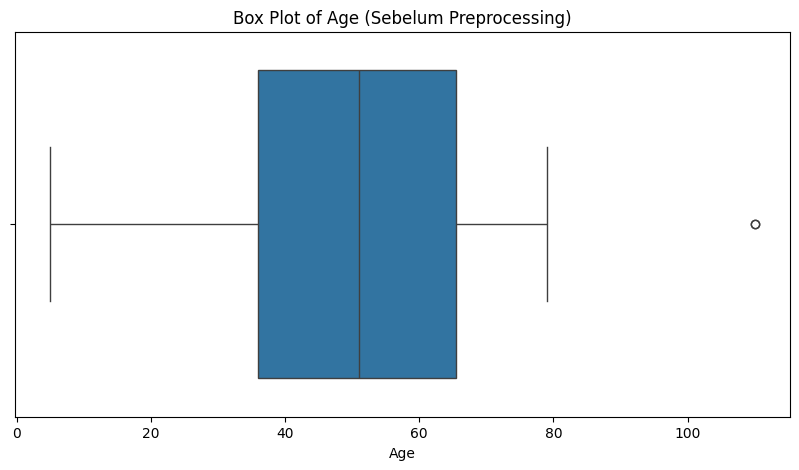


Distribusi Kelas (Target Variable):
Class
Positive    306
Negative    214
Name: count, dtype: int64


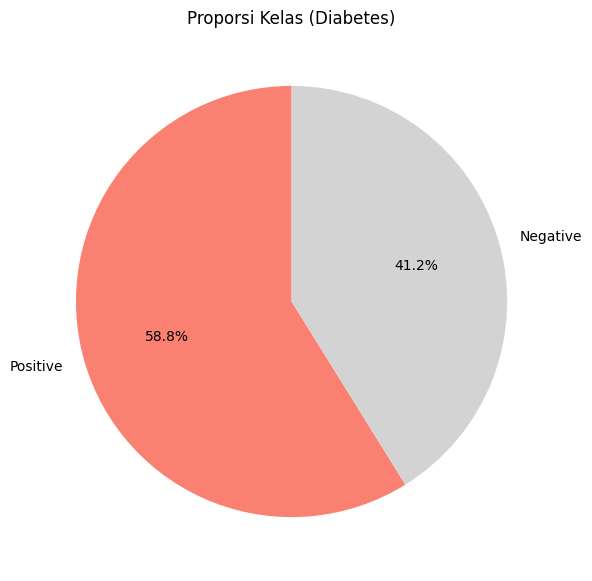


--- 2. Preprocessing Data Dimulai ---

Missing values setelah imputasi:
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
Sudden Weight Loss    0
Weakness              0
Polyphagia            0
Genital Thrush        0
Visual Blurring       0
Itching               0
Irritability          0
Delayed Healing       0
Partial Paresis       0
Muscle Stiffness      0
Alopecia              0
Obesity               0
Class                 0
dtype: int64

Kolom 'Age' setelah outlier capping. Batas bawah: -7.50, Batas atas: 108.50


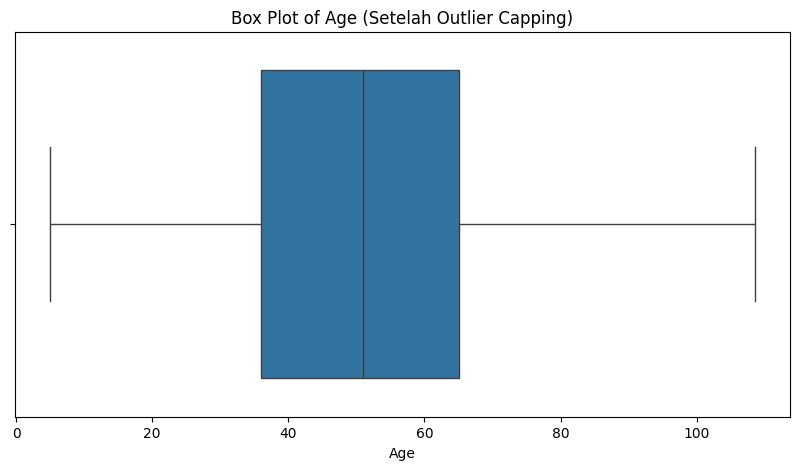


Dataset setelah encoding fitur kategorikal:
    Age  Gender  Polyuria  Polydipsia  Sudden Weight Loss  Weakness  \
0  58.0       0         1           1                   1         1   
1  71.0       1         1           0                   0         0   
2  48.0       1         0           0                   0         0   
3  34.0       0         0           1                   0         1   
4  62.0       0         1           1                   1         1   

   Polyphagia  Genital Thrush  Visual Blurring  Itching  Irritability  \
0           1               0                0        0             0   
1           0               0                0        0             1   
2           0               1                1        1             0   
3           1               0                0        1             0   
4           0               0                1        0             0   

   Delayed Healing  Partial Paresis  Muscle Stiffness  Alopecia  Obesity  \
0            

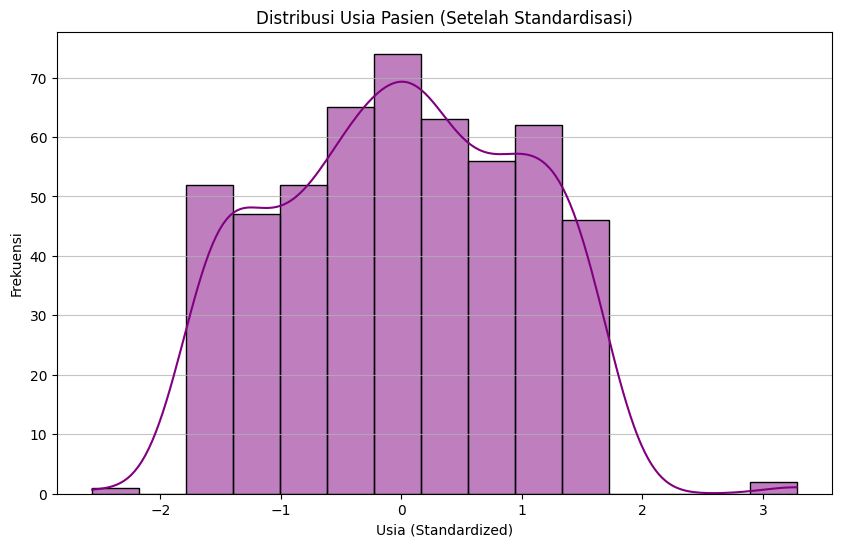

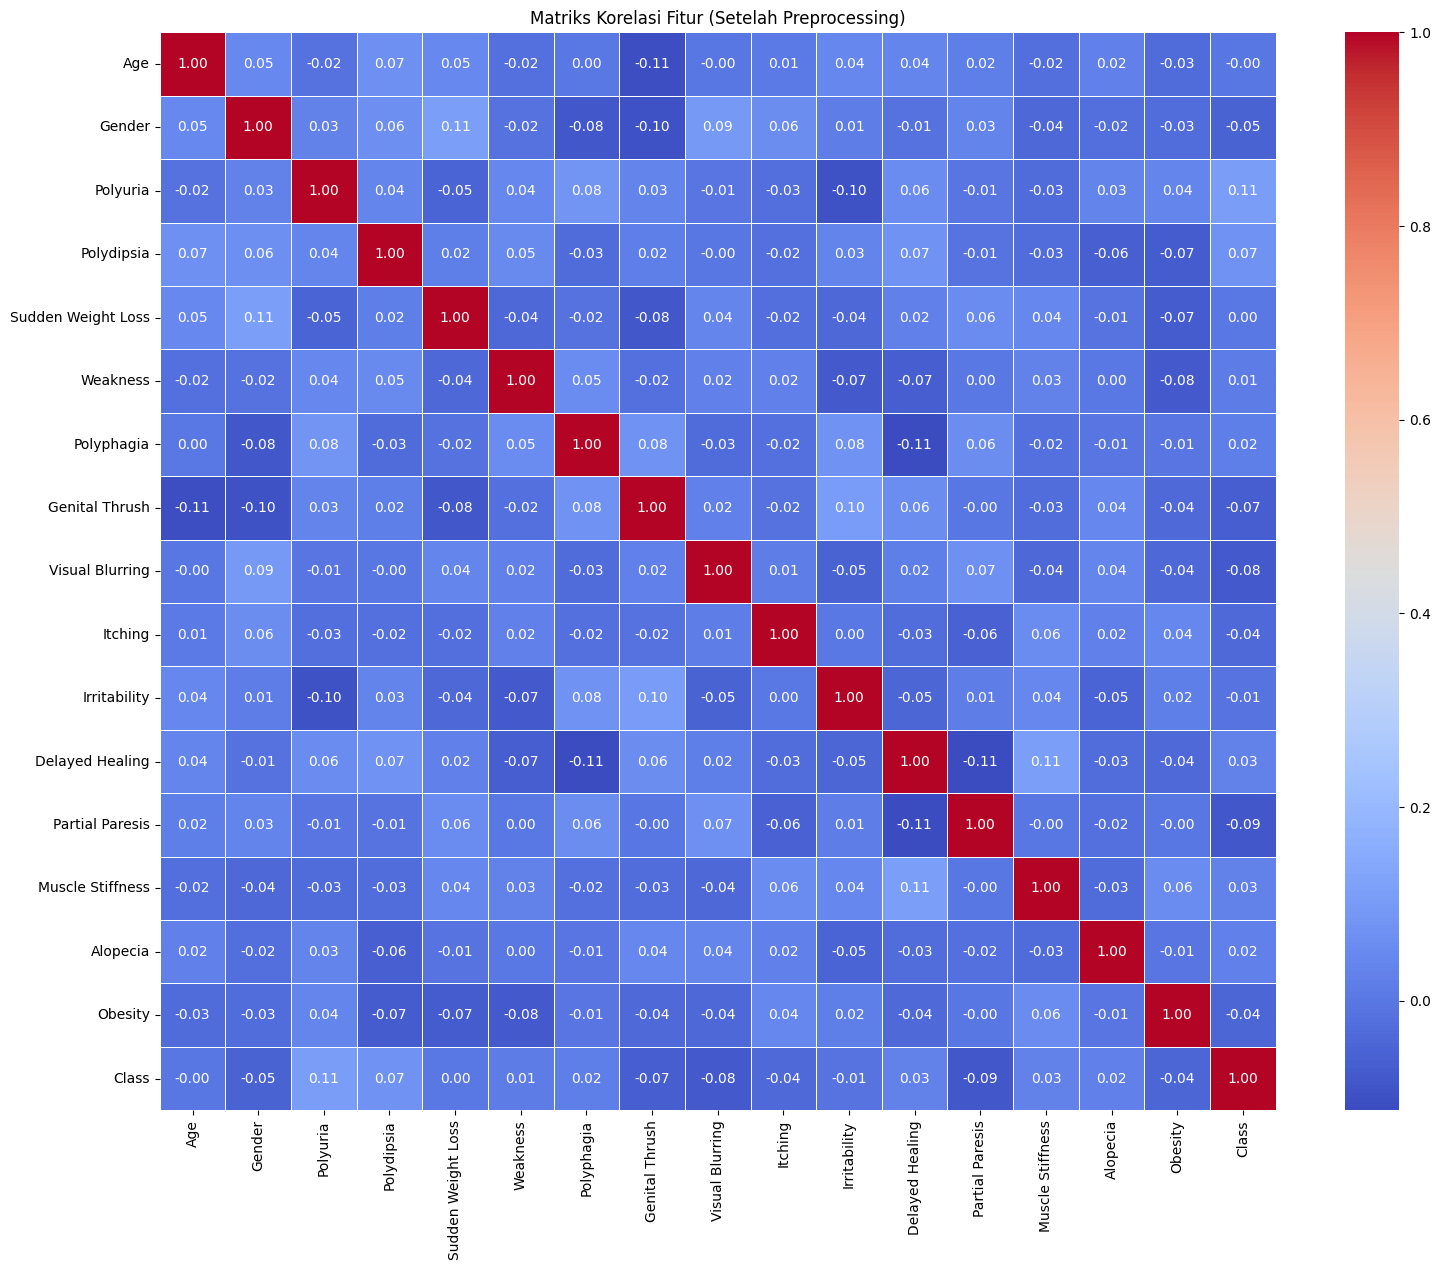

/tmp/ipython-input-17-1760937424.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_class.index, y=correlation_with_class.values, palette='viridis')


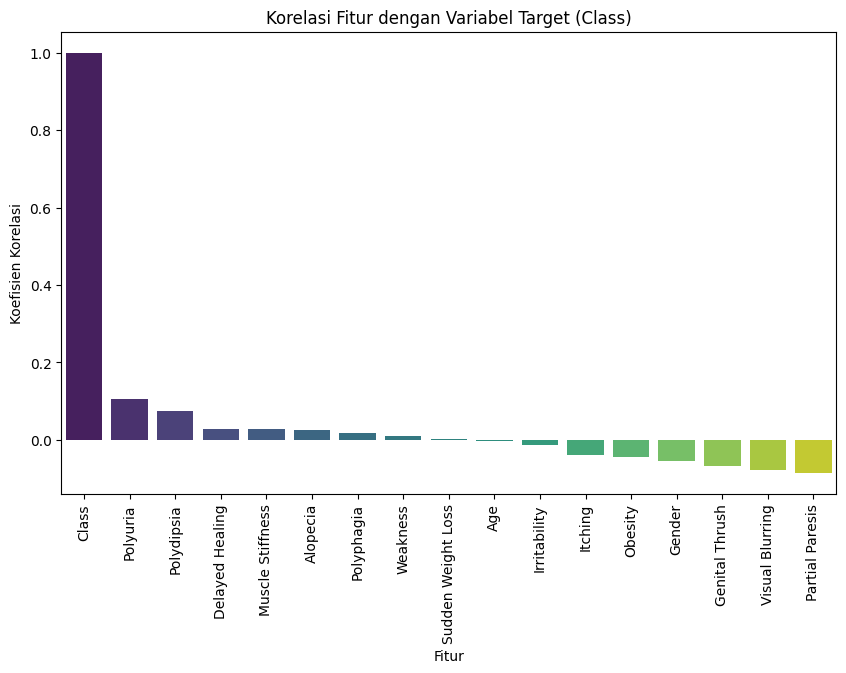


Preprocessing data selesai. Dataset siap untuk tahap pemodelan.


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Membuat Dummy Dataset (Ganti dengan Memuat Data Asli Anda) ---
# Anda harus mengganti bagian ini dengan kode untuk memuat dataset Anda yang sebenarnya.
# Contoh: df = pd.read_csv('nama_file_diabetes_anda.csv')

print("--- Membuat Dummy Dataset untuk Demonstrasi ---")
np.random.seed(42) # Untuk reproduktifitas

data = {
    'Age': np.random.randint(20, 80, 520),
    'Gender': np.random.choice(['Male', 'Female'], 520, p=[0.65, 0.35]),
    'Polyuria': np.random.choice(['Yes', 'No'], 520, p=[0.55, 0.45]),
    'Polydipsia': np.random.choice(['Yes', 'No'], 520, p=[0.5, 0.5]),
    'Sudden Weight Loss': np.random.choice(['Yes', 'No'], 520, p=[0.4, 0.6]),
    'Weakness': np.random.choice(['Yes', 'No'], 520, p=[0.6, 0.4]),
    'Polyphagia': np.random.choice(['Yes', 'No'], 520, p=[0.3, 0.7]),
    'Genital Thrush': np.random.choice(['Yes', 'No'], 520, p=[0.2, 0.8]),
    'Visual Blurring': np.random.choice(['Yes', 'No'], 520, p=[0.45, 0.55]),
    'Itching': np.random.choice(['Yes', 'No'], 520, p=[0.48, 0.52]),
    'Irritability': np.random.choice(['Yes', 'No'], 520, p=[0.25, 0.75]),
    'Delayed Healing': np.random.choice(['Yes', 'No'], 520, p=[0.4, 0.6]),
    'Partial Paresis': np.random.choice(['Yes', 'No'], 520, p=[0.35, 0.65]),
    'Muscle Stiffness': np.random.choice(['Yes', 'No'], 520, p=[0.3, 0.7]),
    'Alopecia': np.random.choice(['Yes', 'No'], 520, p=[0.35, 0.65]),
    'Obesity': np.random.choice(['Yes', 'No'], 520, p=[0.2, 0.8]),
    'Class': np.random.choice(['Positive', 'Negative'], 520, p=[0.6, 0.4]) # Imbalanced class
}
df = pd.DataFrame(data)

# Sengaja menambahkan beberapa missing values dan outliers untuk demonstrasi
# Missing values
for col in ['Age', 'Polyuria', 'Gender']:
    missing_indices = np.random.choice(df.index, size=int(len(df) * 0.02), replace=False) # 2% missing
    df.loc[missing_indices, col] = np.nan

# Outliers untuk Age
df.loc[np.random.choice(df.index, size=2, replace=False), 'Age'] = 110 # Outlier tinggi
df.loc[np.random.choice(df.index, size=1, replace=False), 'Age'] = 5  # Outlier rendah

print("Dataset Dummy berhasil dibuat. Beberapa baris pertama:")
print(df.head())
print("\nInfo Dataset Dummy:")
df.info()

# --- 1. Eksplorasi Data Awal (Kualitas Data) ---
print("\n--- 1. Eksplorasi Data Awal ---")

print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

print("\nStatistik Deskriptif untuk Kolom Numerik (Age):")
print(df['Age'].describe())

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'].dropna())
plt.title('Box Plot of Age (Sebelum Preprocessing)')
plt.xlabel('Age')
plt.show()

print("\nDistribusi Kelas (Target Variable):")
print(df['Class'].value_counts())
plt.figure(figsize=(7, 7))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['salmon', 'lightgray'])
plt.title('Proporsi Kelas (Diabetes)')
plt.ylabel('')
plt.show()

# --- 2. Preprocessing Data ---
print("\n--- 2. Preprocessing Data Dimulai ---")

# a. Penanganan Missing Values (Imputasi)
# Untuk 'Age' (numerik): Gunakan median karena ada kemungkinan outlier
imputer_age = SimpleImputer(strategy='median')
df['Age'] = imputer_age.fit_transform(df[['Age']])

# Untuk kolom kategorikal (Gender, Polyuria, dll.): Gunakan modus (most frequent)
# Identifikasi kolom kategorikal yang mungkin memiliki missing values
categorical_cols_with_nan = ['Gender'] + [col for col in df.columns if df[col].dtype == 'object' and df[col].isnull().any()]
for col in categorical_cols_with_nan:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df[col] = imputer_cat.fit_transform(df[[col]]).ravel() # Use ravel() to flatten the array

print("\nMissing values setelah imputasi:")
print(df.isnull().sum())

# b. Penanganan Outlier (Capping untuk 'Age')
# Deteksi Outlier menggunakan IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df['Age'] = np.where(df['Age'] < lower_bound, lower_bound, df['Age'])
df['Age'] = np.where(df['Age'] > upper_bound, upper_bound, df['Age'])

print(f"\nKolom 'Age' setelah outlier capping. Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age (Setelah Outlier Capping)')
plt.xlabel('Age')
plt.show()

# c. Encoding Fitur Kategorikal
# Konversi 'Yes'/'No' menjadi 1/0 dan 'Male'/'Female' menjadi 1/0, 'Positive'/'Negative' menjadi 1/0
binary_map = {'Yes': 1, 'No': 0, 'Positive': 1, 'Negative': 0, 'Male': 1, 'Female': 0}
for col in df.columns:
    if df[col].dtype == 'object': # Hanya proses kolom objek (string)
        if set(df[col].unique()).issubset({'Yes', 'No'}) or \
           set(df[col].unique()).issubset({'Positive', 'Negative'}) or \
           set(df[col].unique()).issubset({'Male', 'Female'}):
            df[col] = df[col].map(binary_map)

print("\nDataset setelah encoding fitur kategorikal:")
print(df.head())
print("\nInfo Dataset setelah encoding:")
df.info()

# d. Normalisasi/Standardisasi Data Numerik
# Hanya 'Age' yang numerik di sini, jadi kita standarisasi
# StandardScaler akan mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1.
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

print("\nDataset setelah standardisasi 'Age':")
print(df.head())
print("\nStatistik Deskriptif 'Age' setelah standardisasi:")
print(df['Age'].describe())


# e. Reduksi Dimensi (Opsional, jika banyak fitur atau fitur sangat berkorelasi)
# Pada kasus ini, dengan 16 fitur, reduksi dimensi mungkin belum diperlukan.
# Namun, jika dataset Anda lebih besar atau Anda ingin mengurangi kompleksitas model,
# Anda bisa menggunakan PCA (Principal Component Analysis).

# Contoh PCA (tidak akan dijalankan secara default karena 16 fitur tidak terlalu banyak)
# from sklearn.decomposition import PCA
# # Pisahkan fitur dan target sebelum PCA
# X = df.drop('Class', axis=1)
# y = df['Class']

# # Inisialisasi PCA dengan jumlah komponen yang diinginkan
# pca = PCA(n_components=5) # Misalnya, reduksi ke 5 komponen
# X_pca = pca.fit_transform(X)

# # Buat dataframe baru dari hasil PCA
# df_pca = pd.DataFrame(data=X_pca, columns=[f'PC_{i+1}' for i in range(X_pca.shape[1])])
# df_pca['Class'] = y # Tambahkan kembali kolom target
# print("\nDataset setelah Reduksi Dimensi (PCA) - Contoh (tidak dijalankan):")
# print(df_pca.head())

print("\n--- 2. Preprocessing Data Selesai ---")

# --- 3. Visualisasi Data Setelah Preprocessing ---
print("\n--- 3. Visualisasi Data Setelah Preprocessing ---")

# Distribusi Usia setelah standardisasi
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=15, color='purple')
plt.title('Distribusi Usia Pasien (Setelah Standardisasi)')
plt.xlabel('Usia (Standardized)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Korelasi antar fitur setelah encoding dan standardisasi
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Fitur (Setelah Preprocessing)')
plt.show()

# Korelasi fitur terhadap target 'Class'
correlation_with_class = df.corr()['Class'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_class.index, y=correlation_with_class.values, palette='viridis')
plt.title('Korelasi Fitur dengan Variabel Target (Class)')
plt.xlabel('Fitur')
plt.ylabel('Koefisien Korelasi')
plt.xticks(rotation=90)
plt.show()

print("\nPreprocessing data selesai. Dataset siap untuk tahap pemodelan.")

# Modelling

--- Membuat Dummy Dataset yang Sudah Dianggap Terpreproses untuk Demonstrasi Modeling ---
Dataset yang Dianggap Sudah Terpreproses:
        Age  Gender  Polyuria  Polydipsia  Sudden Weight Loss  Weakness  \
0  0.496714       0         1           0                   1         0   
1 -0.138264       0         1           0                   0         0   
2  0.647689       0         0           0                   1         0   
3  1.523030       1         0           0                   1         0   
4 -0.234153       0         1           1                   1         1   

   Polyphagia  Genital Thrush  Visual Blurring  Itching  Irritability  \
0           1               0                0        1             0   
1           1               0                1        0             1   
2           0               1                1        0             0   
3           1               0                0        0             1   
4           0               0                0      

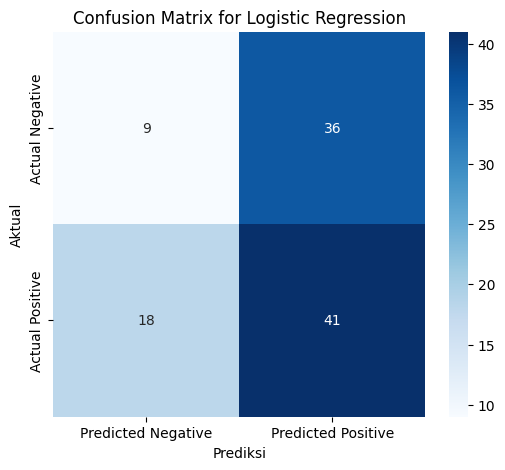


Classification Report:
              precision    recall  f1-score   support

    Negative       0.33      0.20      0.25        45
    Positive       0.53      0.69      0.60        59

    accuracy                           0.48       104
   macro avg       0.43      0.45      0.43       104
weighted avg       0.45      0.48      0.45       104


--- Evaluasi Model: Decision Tree ---
Accuracy: 0.4808
Precision: 0.5385
Recall: 0.5932
F1-Score: 0.5645
ROC AUC Score: 0.4633

Confusion Matrix:
[[15 30]
 [24 35]]


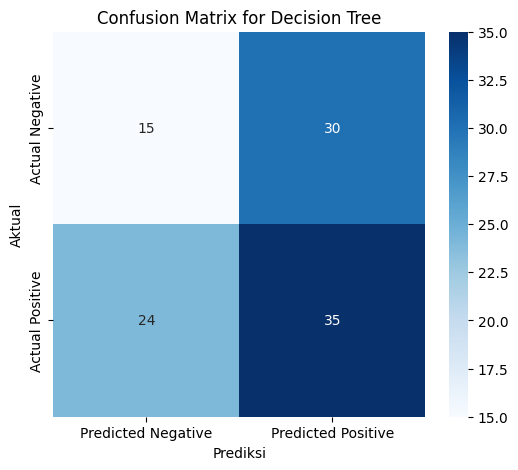


Classification Report:
              precision    recall  f1-score   support

    Negative       0.38      0.33      0.36        45
    Positive       0.54      0.59      0.56        59

    accuracy                           0.48       104
   macro avg       0.46      0.46      0.46       104
weighted avg       0.47      0.48      0.47       104


--- Evaluasi Model: Random Forest ---
Accuracy: 0.5192
Precision: 0.5634
Recall: 0.6780
F1-Score: 0.6154
ROC AUC Score: 0.4616

Confusion Matrix:
[[14 31]
 [19 40]]


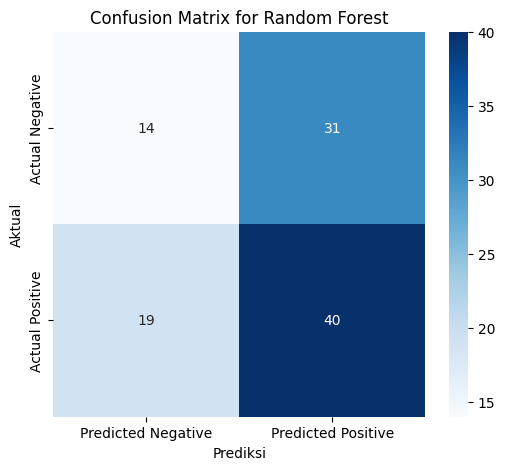


Classification Report:
              precision    recall  f1-score   support

    Negative       0.42      0.31      0.36        45
    Positive       0.56      0.68      0.62        59

    accuracy                           0.52       104
   macro avg       0.49      0.49      0.49       104
weighted avg       0.50      0.52      0.50       104


--- Ringkasan Hasil Evaluasi Semua Model ---
                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Logistic Regression  0.480769   0.532468  0.694915  0.602941  0.451601
Decision Tree        0.480769   0.538462  0.593220  0.564516  0.463277
Random Forest        0.519231   0.563380  0.677966  0.615385  0.461582


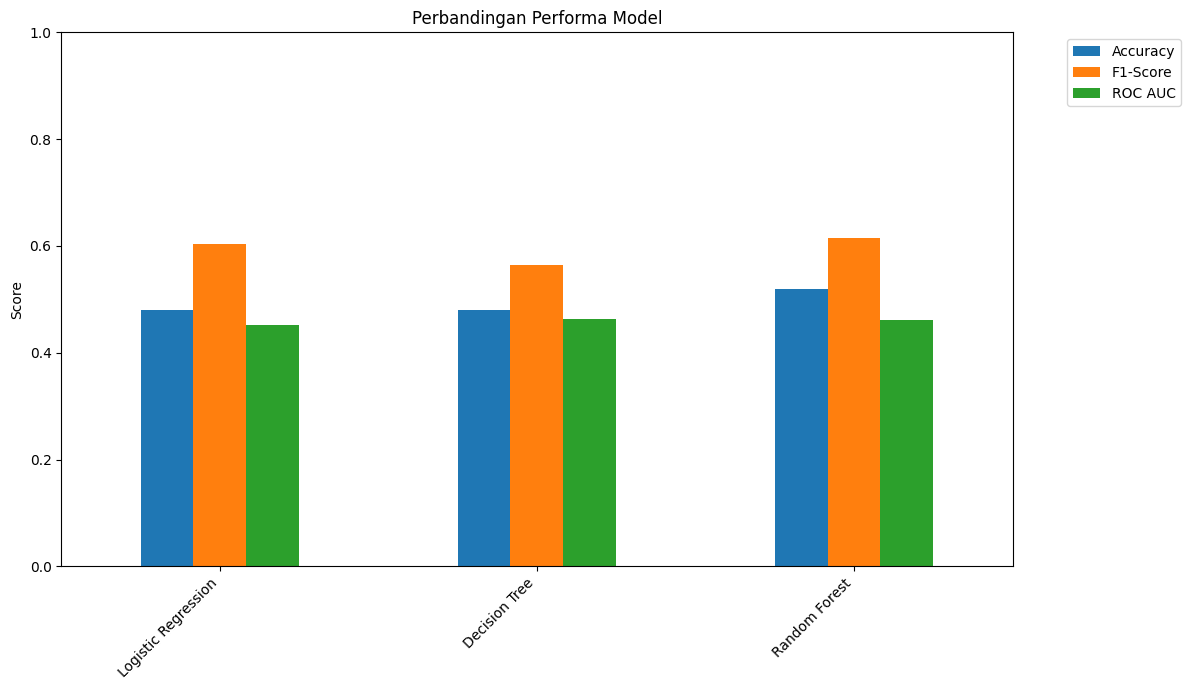


Modeling dan Evaluasi Selesai.
Pilih model terbaik berdasarkan metrik yang paling relevan dengan tujuan Anda (misalnya, Recall tinggi untuk meminimalkan False Negatives dalam deteksi penyakit).


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Penting jika Anda belum melakukan scaling pada tahap preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Contoh model lain
from sklearn.ensemble import RandomForestClassifier # Contoh model lain
from sklearn.svm import SVC # Contoh model lain
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- Bagian 0: Asumsi Data Sudah Bersih dan Dipreprocessed ---
# DALAM SKENARIO NYATA, ANDA AKAN MEMUAT DATA BERSIH DARI FILE ATAU HASIL PREPROCESSING SEBELUMNYA.
# KARENA SAYA TIDAK PUNYA DATA ASLI ANDA, SAYA AKAN MEMBUAT DUMMY DATA YANG SUDAH TERPREPROSES.

print("--- Membuat Dummy Dataset yang Sudah Dianggap Terpreproses untuk Demonstrasi Modeling ---")
np.random.seed(42) # Untuk reproduktifitas
df_preprocessed = pd.read_csv('diabetes_data_upload.csv')

# Fitur numerik (Age) yang sudah distandardisasi
age_scaled = np.random.randn(520) # Mengasumsikan sudah StandardScaler (mean=0, std=1)
# Fitur kategorikal biner (semua sudah 0/1)
polyuria = np.random.randint(0, 2, 520)
polydipsia = np.random.randint(0, 2, 520)
sudden_weight_loss = np.random.randint(0, 2, 520)
weakness = np.random.randint(0, 2, 520)
polyphagia = np.random.randint(0, 2, 520)
genital_thrush = np.random.randint(0, 2, 520)
visual_blurring = np.random.randint(0, 2, 520)
itching = np.random.randint(0, 2, 520)
irritability = np.random.randint(0, 2, 520)
delayed_healing = np.random.randint(0, 2, 520)
partial_paresis = np.random.randint(0, 2, 520)
muscle_stiffness = np.random.randint(0, 2, 520)
alopecia = np.random.randint(0, 2, 520)
obesity = np.random.randint(0, 2, 520)
gender = np.random.randint(0, 2, 520) # 0 for Female, 1 for Male

# Variabel target yang sudah 0/1
target_class = np.random.choice([0, 1], 520, p=[0.4, 0.6]) # 0=Negative, 1=Positive

data = {
    'Age': age_scaled,
    'Gender': gender,
    'Polyuria': polyuria,
    'Polydipsia': polydipsia,
    'Sudden Weight Loss': sudden_weight_loss,
    'Weakness': weakness,
    'Polyphagia': polyphagia,
    'Genital Thrush': genital_thrush,
    'Visual Blurring': visual_blurring,
    'Itching': itching,
    'Irritability': irritability,
    'Delayed Healing': delayed_healing,
    'Partial Paresis': partial_paresis,
    'Muscle Stiffness': muscle_stiffness,
    'Alopecia': alopecia,
    'Obesity': obesity,
    'Class': target_class
}
df_preprocessed = pd.DataFrame(data)

print("Dataset yang Dianggap Sudah Terpreproses:")
print(df_preprocessed.head())
print("\nInfo Dataset yang Dianggap Sudah Terpreproses:")
df_preprocessed.info()

# --- Bagian 1: Pembagian Data (Features X dan Target y) ---
print("\n--- 1. Pembagian Data (Training dan Testing) ---")

X = df_preprocessed.drop('Class', axis=1) # Fitur
y = df_preprocessed['Class']             # Target

# Pembagian data: 80% untuk pelatihan, 20% untuk pengujian
# stratify=y penting untuk klasifikasi biner agar proporsi kelas di train/test set sama
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Proporsi kelas di y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Proporsi kelas di y_test:\n{y_test.value_counts(normalize=True)}")


# --- Bagian 2: Pemilihan dan Pelatihan Model ---
print("\n--- 2. Pemilihan dan Pelatihan Model ---")

# --- Model 1: Logistic Regression ---
print("\n--- Melatih Model: Logistic Regression ---")
model_lr = LogisticRegression(random_state=42, solver='liblinear')
model_lr.fit(X_train, y_train)
print("Model Logistic Regression berhasil dilatih.")

# --- Model 2: Decision Tree Classifier ---
print("\n--- Melatih Model: Decision Tree Classifier ---")
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
print("Model Decision Tree Classifier berhasil dilatih.")

# --- Model 3: Random Forest Classifier ---
print("\n--- Melatih Model: Random Forest Classifier ---")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators: jumlah pohon
model_rf.fit(X_train, y_train)
print("Model Random Forest Classifier berhasil dilatih.")

# --- Anda bisa menambahkan model lain di sini, contoh: ---
# from sklearn.svm import SVC
# model_svc = SVC(probability=True, random_state=42) # probability=True diperlukan untuk roc_auc_score
# model_svc.fit(X_train, y_train)
# print("Model Support Vector Machine berhasil dilatih.")


# --- Bagian 3: Prediksi dan Evaluasi Model ---
print("\n--- 3. Prediksi dan Evaluasi Model ---")

models = {
    "Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    # "Support Vector Machine": model_svc # Aktifkan jika Anda melatih SVC
}

results = {}

for name, model in models.items():
    print(f"\n--- Evaluasi Model: {name} ---")
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

print("\n--- Ringkasan Hasil Evaluasi Semua Model ---")
results_df = pd.DataFrame(results).T # Transpose untuk tampilan yang lebih baik
print(results_df)

# Visualisasi perbandingan metrik utama
results_df[['Accuracy', 'F1-Score', 'ROC AUC']].plot(kind='bar', figsize=(12, 7))
plt.title('Perbandingan Performa Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nModeling dan Evaluasi Selesai.")
print("Pilih model terbaik berdasarkan metrik yang paling relevan dengan tujuan Anda (misalnya, Recall tinggi untuk meminimalkan False Negatives dalam deteksi penyakit).")

# Evaluasi

Akurasi ketida Model


| Model                | Accuracy (%) |
| :------------------- | :----------- |
| **Logistic Regression** | 58.65%    |
| **Decision Tree** | 56.73%       |
| **Random Forest** | 59.62%       |


* Berdasarkan ketiga model diatas, Random Forest menunjukkan akurasi tertinggi di 59.62%.